# Arbol de Decisiones

***El notebook es basado en el libro Hands-On Machine Learning with scikit-learn and Tensorflow de Aurélien Géron***

Instalamos algunas dependencias que no están en el ambiente virtual

In [1]:
!pip install pydot

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

# Training and visualizing

Como los SVMs el arbol de decisines es una herramienta que también permite tanto clasificación y regresión, incluso múltiples salidas.  Son capaces de manejar datasets complejos.

Los árboles de decisiones son un componente fundamental de Random Forests, y uno de los algoritmos más usados y fuertes de Machine Learning.

Entrenaremos, visualizaremos y realizaremos predicciones con Árboles de Decisiones.  Tambien se utilizará el CART (Classification and Regression Trees) para tareas de regresión

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [4]:
from sklearn.tree import export_graphviz
import os

path = os.path.join(os.getcwd(), 'images', 'decision_trees')
os.makedirs(path, exist_ok=True)

export_graphviz(
        tree_clf,
        out_file=image_path("iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

El codigo anterior exporta una grafica de visualización de arbol de decisiones en un formato .dot.  Si estamos en linux podemos realizar la impresion en PNG para visualizarlo como se muestra debajo.

Para su conveniencia la imagen fue generada y está en la carpeta 'images', 'decision_trees'

In [5]:
#solo si estamos en linux y dot está instalado

#from subprocess import check_call

#os.path.join(path, 'iris_tree.dot')
#check_call(['dot','-Tpng', os.path.join(path, 'iris_tree.dot'),'-o','iris_tree.png'])


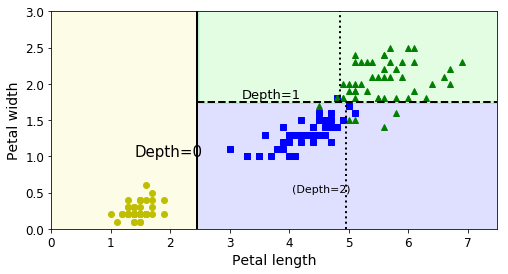

In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)


plt.show()

Del codigo anterior se supuso que queria clasificar el iris dataset.  

Si observa la imagen de PNG generada en la carpeta 'images' 'decision_trees' se empieza de un nodo raíz de profundidad 0 en el borde superior.  El primer nodo pregunta cual de los petalos de flores es menor a 2.45.

Seguido si es cierto se mueve uno al nodo izquierdo, profundidad 1, que no tienen ningun ramal hijo y se sabe que la respuesta es setosa.

Si es falso nos movemos a la derecha, profundidad 1, y preguntamos que tipo de ancho de pétalo es, si es menor a 1.75 nos movemos al siguiente nodo izquierdo, siendo como resultado iris-versicolor; de lo contrario nos movemos al nodo derecho donde el resultado seria iris-virginica.

Una ventaja de los árboles es que no requieren tanta preparación de los datos.  En particular, no requieren que se escalen las características o se centren del todo.

Note de la figura PNG las muestras del nodo 0, en los nodos 1 si sumamos tenemos el total del nodo 0, quiere decir que de ese dataset 50 muestras eran de petalos menores o iguales a 2.45 y 100 eran mayores a 2.45.

Así mismo del nodo 1 hacia los nodos 2, 54 eran de ancho de petalo menor o igual a 1.75 y las otras 46 eran mayores a 1.75.

Otro dato es el atributo llamado 'gini' que da el nivel de impuridad.  Como para el nodo 1 de la izquierda el gini es 0 es porque todas perteneces a la misma clase.

La ecuación de impuridad de gini es:
\begin{equation}
G_i = 1 - \sum_{k=1}^{n} p_{i,k^2}
\end{equation}
$p_{i,k}$ es la rata de clase k de las instancias de entrenamiento del $i^{th}$ nodo.

La figura anterior son los limites del arbol de decision.  La linea gruesa vertical representa el límite de decisión del nodo 0.  Las otras áreas corresponden a las otras profundidades, por ejemplo, si observa la linea horizontal divide a 1.75 de ancho de petalo y así sucesivamente.

Estos modelos se les conoce como cajas blancas porque son fáciles de interpretar a simple vista, las redes neuronales se consideran cajas negras pues a pesar que tienen buena representación de los datos es dificil saber como se comportan salvo las métricas de evaluación que nos dan un avistamiento del modelo.

# Prediciendo clases y las probabilidades de clases

In [7]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [8]:
tree_clf.predict([[5, 1.5]])

array([1])

El nodo como se puede saber representa las clases de manera de condicionales, así por ejemplo si tenemos una flor con 5cm de largo y 1.5cm de ancho, si viajamos por los nodos llegaremos al nodo izquierdo de profunidad 2

- 0%    (0/54)  Iris-Setosa
- 90.7% (49/54) Iris-Versicolor
- 9.3%  (5/54)  Iris-Virginica

La clase predichas es la clase 1

#### El algoritmo de CART

Se les conoce como algoritmo de arbol creciente.  El algoritmo va dividiendo el training set en dos subsets usando una caracterstica 'k' y un umbral $t_k$, como vimos con el largo de pétalo.  Este algoritmo escoge entonces entre el par $(k, t_k)$ que produce subsets puros.  La funcion de costo que el algoritmo trata de minimizar es:

\begin{equation}
J(k,t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}
\end{equation}

Donde, $G_{left/right}$ mide la impuridad de izquierda/derecha del subconjunto} y $m_{left/right}$ mide el número de instancias en izquierda/derecha del subconjunto.

Seguidamente sigue separando subsets con la misma logica, lo hace recursivamente hasta que encuentra la última profunidad max_depth.  Existen otros parámetros de control.

Al CART también se le conoce como un algoritmo 'greedy' o codicioso pero que al final no siempre lleva a una solución óptima.

Los árboles de decisiones son generalemten de raíza a hoja, balanceados y requieren $O(log_2(m))$ nodos  así mismo es su complejidad computacional independientemente del número de características, así que las predicciones son bastante rápidas.

En training demoran $O(n * m *log(m))$ y para pequeños training sets se puede acelerar con presort=true.

El factor de Gini es una manera de medir entropia.  Entropía en termodinamica es desorden molecular, así que equivalentemente si es 0 estarán ordenadas.

\begin{equation}
H_i = 1 - \sum_{k=1}^{n} p_{i,k}*log(p_i,k)
\end{equation}

Para el último nodo la entropía será = -(49/54)*log(49/54) - (5/54)*log(5/54) = 0.31.

# Sensitividad a los detalles de entrenamiento

In [9]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower

array([[4.8, 1.8]])

In [10]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=40, splitter='best')

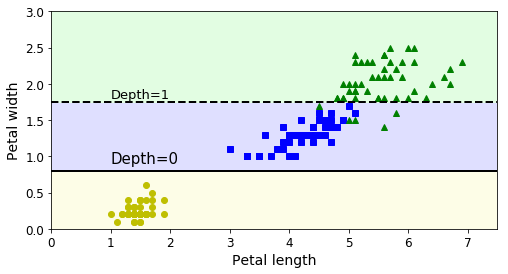

In [11]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

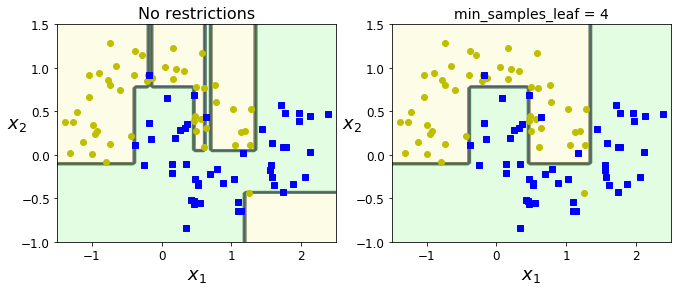

In [12]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

Los árboles de decision realizan pocas asumsiones de la data de entrenamiento (no asume linealidad, p.e.).  Este tratará de hacer que la data se ajuste o más bien el modelo, lo que puede conllevar a overfitting.

Este modelo es llamado no paramétrico, pues además de no tener ningun parámetro (que en verdad tiene muchos), este permite que se ajuste lo más cercano a la data.

Por otro lado, un modelo lineal es parametrizado y sus grados de libertad de modelo son limitados, reduciendo el riesgo de overfitting.  Recuerde que la manera de prevenir overfitting es regularizando los datos, esto, en árbol de decisiones se puede dar reduciendo el nivel de profundidad del árbol (max_depth).  

Existen otros modelos como DecisionTreeClassifier que tienen otros parámetros como min_samples_split, min_samples_leaft, etc.

En la primera figura izquierda vemos el arbol de decision sin muchos parámetros de configuración y en la figura derecha observamos com min_samples_leaf=4 de entrenamiento.  El modelo de la izquierda esta en overfitting pues los datos tienen a tratar de separarse finamente.  El modelo de la derecha generaliza mejor los datos. 

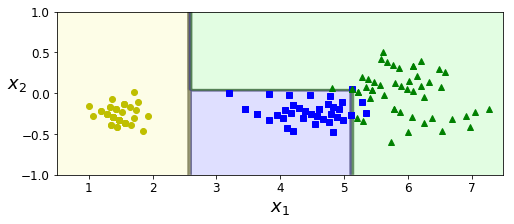

In [13]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

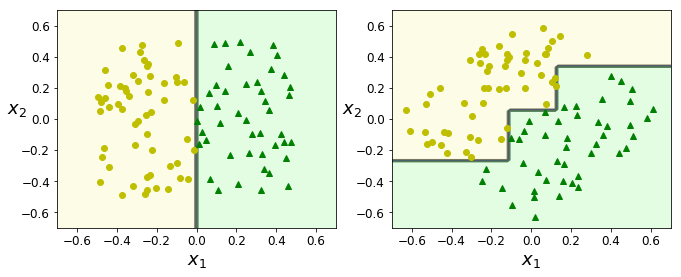

In [14]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.show()

La ventaja de un arbol de decisión es que es fácil de interpretar.
La limitación del arbol de decision son que las fronteras de decisión son ortogonales, no curvas.

El árbol de decision de la izquierda tiene 0 rotación, mientras que el de la derecha es el mismo dataset con rotación a 45° y lo pudo dividir satisfactoriamente.

A pesar que dividio bien el dataset puede que el modelo no generalice bien.  Existe otro método que se estudiará más adelante llamado PCA (Principal Component Analysis) que tiene mejor orientación en los datos de entrenamiento.

Los árboles de decisiones son sensitivos a pequeñas variaciones del training.  Por ejemplo, en la figura enterior a la superios se remueve Iris-Versicolor que es la más amplia y se entrenó nuevamente el modelo.  Este arbol de decision es diferente al de tres flores a clasificar a menos que se haya ajustado el parámetro random_state

# Árboles de Regresión

In [15]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [16]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

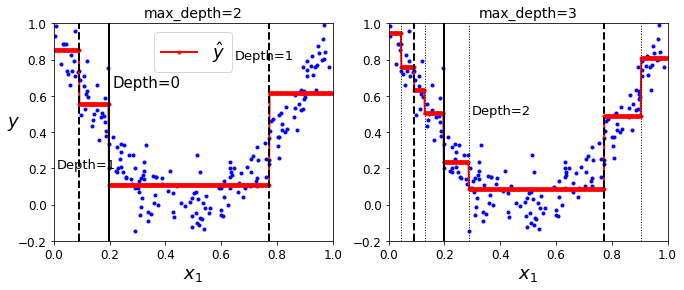

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)


plt.show()

Adicionalmente los árboles de decisión son capaces de realizar tareas de regresión.

El algoritmo de CART trabaja de manera parecida a lo anterior descrito, pero en esta ocasión intenta dividir el training set para minimizar el MSE.  Busque la ecuación de CART para regresión y verá que se parece al de clasificación.
\begin{equation}
J(k,t_k) = \frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right}
\end{equation}
En donde
\begin{equation}
MSE_{node} = \sum (y_{pred} - y^{(i)})
\end{equation}
\begin{equation}
y_{pred} = \frac{1}{m_{node}} \sum y^{(i)}
\end{equation}

In [18]:
export_graphviz(
        tree_reg1,
        out_file=image_path("regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

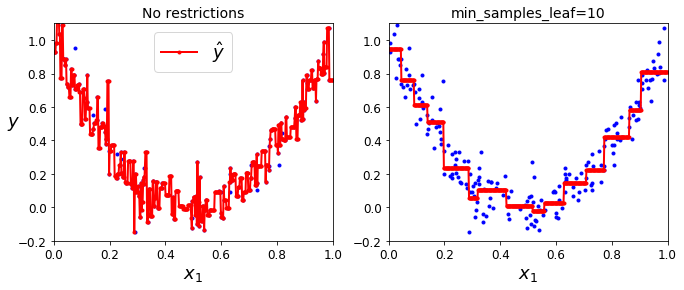

In [19]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)


plt.show()

Si observamos en la imagen que está en la carpeta 'images' 'regression_trees' observaremos algo similar a lo anterior visto.

Supongamos que la característica a buscar es x1=0.6, viajaremos por todo el árbol y observaremos que el valor de la predicción es de 0.1106.  Este es el valor de la predicción promedio de 110 instancias de entrenamiento asociadas al nodo.  El patron de MSE es de 0.0151 sobre 110 instancias o muestras.

Para este caso max_depth = 3

Así como las tareas de clasificación, los árboles de decision de regresión tienden a overfitting.  Observe la figura superior izquierda.  Este es obvio que tiende a overfitting severamente.  Si ajustamos min_samples_leaf=10 observamos el modelo de la derecha que divide mejor el training set.

# Laboratorio

Primera parte (50%)
- Genere un moons dataset con scikit-learn make_moons(n_samples=1000, noise=0.4)
- Divida en training y test set utilizando train_test_split()
- Utilice grid search con cross validation (GridSearchCV) para encotnrar buenos o los mejores hiperparámetros de DecisionTreeClassifier (variando max_leaf_nodes)
- Entrene usando estos hiperparámetros, debe lograr sobre 85% de precisión

Segunda parte (50%)
- Cargue el dataset de la carpeta
- Elimine todas las columnas menos B, C y D
- Divida en training y test set utilizando train_test_split() a 70% training
- Utilice grid search con alguna métrica de validación (GridSearchCV) para encontrar buenos o los mejores hiperparámetros del regresor
- Entrene usando estos hiperparámetros, debe lograr sobre 85% sobre la métrica seleccionada